In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('musica.csv')
data.head(4)

id                          name       artists  \
0  6DCZcSspjsKoFjzjrWoCd                    God's Plan       Santana   
1  3ee8Jmje8o58CHK66QrVC                          SAD!  XXXTENTACION   
2  0e7ipj03S05BNilyu5bRz    rockstar (feat. 21 Savage)   Post Malone   
3  3swc6WTsr7rl9DqQKQA55  Psycho (feat. Ty Dolla $ign)   Post Malone   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.754   0.449  7.0    -9.211   1.0       0.1090        0.0332   
1         0.740   0.613  8.0    -4.880   1.0       0.1450        0.2580   
2         0.587   0.535  5.0    -6.090   0.0       0.0898        0.1170   
3         0.739   0.559  8.0    -8.011   1.0       0.1170        0.5800   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000083     0.552    0.357   77.169     198973.0             4.0  
1          0.003720     0.123    0.473   75.023     166606.0             4.0  
2          0.000066     0.131    0.140  159.847     218147.0             4.0  
3          0.000000     0.112    0.439  140.124     221440.0             4.0

In [ ]:
pais = ['1','2','2','1','2','2','1','2','2','1','2','2','1','2','2','2','2','1','2','2','2','2','1','2','2','2','2','1','2','2','2','2','1','2','2','1','2','2','1','2','1','2','2','1','2','1','2','2','1','2','1','2','2','1','2','2','1','2','2','1','2','2','1','2','2','2','2','1','2','2','2','2','1','2','2','2','2','1','2','2','2','2','1','2','2','1','2','2','1','2','1','2','2','1','2','1','2','2','1','2']

In [ ]:
data['pais']=pais

In [ ]:
data.head(20)

id                            name         artists  \
0   6DCZcSspjsKoFjzjrWoCd                      God's Plan         Santana   
1   3ee8Jmje8o58CHK66QrVC                            SAD!    XXXTENTACION   
2   0e7ipj03S05BNilyu5bRz      rockstar (feat. 21 Savage)     Post Malone   
3   3swc6WTsr7rl9DqQKQA55    Psycho (feat. Ty Dolla $ign)     Post Malone   
4   2G7V7zsVDxg1yRsu7Ew9R                  In My Feelings           Drake   
5   7dt6x5M1jzdTEt8oCbisT                      Better Now     Post Malone   
6   58q2HKrzhC3ozto2nDdN4                       I Like It         Cardi B   
7   7ef4DlsgrMEH11cDZd32M        One Kiss (with Dua Lipa)   Calvin Harris   
8   76cy1WJvNGJTj78UqeA5z                           IDGAF        Dua Lipa   
9   08bNPGLD8AhKpnnERrAc6                         FRIENDS      Marshmello   
10  1rfofaqEpACxVEHIZBJe6                          Havana  Camila Cabello   
11  0s3nnoMeVWz3989MkNQiR                    Lucid Dreams      Juice WRLD   
12  3CA9pLiwRIGtUBiMjbZmR                   Nice For What           Drake   
13  7fa9MBXhVfQ8P8Df9OEbD  Girls Like You (feat. Cardi B)        Maroon 5   
14  09IStsImFySgyp0pIQdqA                      The Middle            Zedd   
15  3GCdLUSnKSMJhs4Tj6CV3        All The Stars (with SZA)  Kendrick Lamar   
16  2qT1uLXPVPzGgFOx4jtEu            no tears left to cry   Ariana Grande   
17  39N9RPD9MRb5WmoLzNzPe                               X       Nicky Jam   
18  0JP9xo3adEtGSdUEISisz                       Moonlight    XXXTENTACION   
19  4qKcDkK6siZ7Jp1Jb4m0a        Look Alive (feat. Drake)      BlocBoy JB   

    danceability  energy   key  loudness  mode  speechiness  acousticness  \
0          0.754   0.449   7.0    -9.211   1.0       0.1090       0.03320   
1          0.740   0.613   8.0    -4.880   1.0       0.1450       0.25800   
2          0.587   0.535   5.0    -6.090   0.0       0.0898       0.11700   
3          0.739   0.559   8.0    -8.011   1.0       0.1170       0.58000   
4          0.835   0.626   1.0    -5.833   1.0       0.1250       0.05890   
5          0.680   0.563  10.0    -5.843   1.0       0.0454       0.35400   
6          0.816   0.726   5.0    -3.998   0.0       0.1290       0.09900   
7          0.791   0.862   9.0    -3.240   0.0       0.1100       0.03700   
8          0.836   0.544   7.0    -5.975   1.0       0.0943       0.04030   
9          0.626   0.880   9.0    -2.384   0.0       0.0504       0.20500   
10         0.765   0.523   2.0    -4.333   1.0       0.0300       0.18400   
11         0.511   0.566   6.0    -7.230   0.0       0.2000       0.34900   
12         0.586   0.909   8.0    -6.474   1.0       0.0705       0.08910   
13         0.851   0.541   0.0    -6.825   1.0       0.0505       0.56800   
14         0.753   0.657   7.0    -3.061   1.0       0.0449       0.17100   
15         0.698   0.633   8.0    -4.946   1.0       0.0597       0.06050   
16         0.699   0.713   9.0    -5.507   0.0       0.0594       0.04000   
17         0.595   0.773   9.0    -4.736   0.0       0.0549       0.03640   
18         0.921   0.537   9.0    -5.723   0.0       0.0804       0.55600   
19         0.922   0.581  10.0    -7.495   1.0       0.2700       0.00104   

    instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.000083    0.5520    0.357   77.169     198973.0             4.0   
1           0.003720    0.1230    0.473   75.023     166606.0             4.0   
2           0.000066    0.1310    0.140  159.847     218147.0             4.0   
3           0.000000    0.1120    0.439  140.124     221440.0             4.0   
4           0.000060    0.3960    0.350   91.030     217925.0             4.0   
5           0.000000    0.1360    0.374  145.028     231267.0             4.0   
6           0.000000    0.3720    0.650  136.048     253390.0             4.0   
7           0.000022    0.0814    0.592  123.994     214847.0             4.0   
8           0.000000    0.0824    0.510   97.028     21794

In [39]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791963


In [41]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


In [42]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [43]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sat, 23 Jul 2022   Prob (F-statistic):            0.00906
Time:                        21:22:44   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

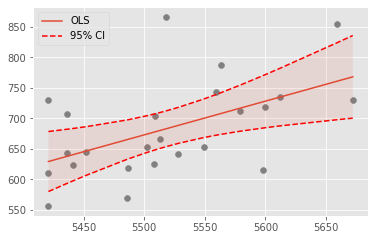

In [45]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();